In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from math import exp, factorial
from scipy import stats

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

##### Analysis of Exercise 1 

This exercise examines whether the number of hurricanes in 2005 (15) is significantly higher than the historical average (6.3), using the Poisson distribution to model the number of events.

- **Poisson formula:** 
  $$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!} $$
  where $\lambda \$ = 6.3 hurricanes/year

- **Probability calculation:** 
  We calculate $P(X \geq 15)$ as $1 - P(X \leq 14) $ of the Poisson distribution.
  $$ P(X \geq 15) = 1 - \sum_{k=0}^{14} \frac{6.3^k e^{-6.3}}{k!} $$

- **Hypothesis test:** 
  The calculated probability is compared with a significance level of 0.022 (Z score of 2).
  $$ \text{Significant if } P(X \geq 15) < 0.022 $$

In [2]:
# Number of hurricanes in 2005
x = 15
# Historical average number of hurricanes per year
lambda_ = 6.3
# Significance level for hypothesis testing
alpha = 0.022

def poisson_probability(k, lambda_):
    return exp(-lambda_) * lambda_**k / factorial(k)

def cumulative_poisson_probability(k, lambda_):
    cumulative_prob = 0
    for i in range(k + 1):
        cumulative_prob += poisson_probability(i, lambda_)
    return cumulative_prob

# Calculate the probability of observing more than 15 hurricanes
z = 1 - cumulative_poisson_probability(14, lambda_)
print(f"Probability of observing more than 15 hurricanes: {z:.4f}")

# Check if the probability is less than the significance level
significant = z < alpha
print(f"Is the number of hurricanes in 2005 significantly higher than the historical average ? {'Yes' if significant else 'No'}")

Probability of observing more than 15 hurricanes: 0.0022
Is the number of hurricanes in 2005 significantly higher than the historical average ? Yes


In [3]:
# The calculated probability of 0.0022 of observing more than 15 hurricanes in one year is below the predefined significance level of 0.022. 
# Therefore, the number of hurricanes in 2005 was significantly different from the historical average.

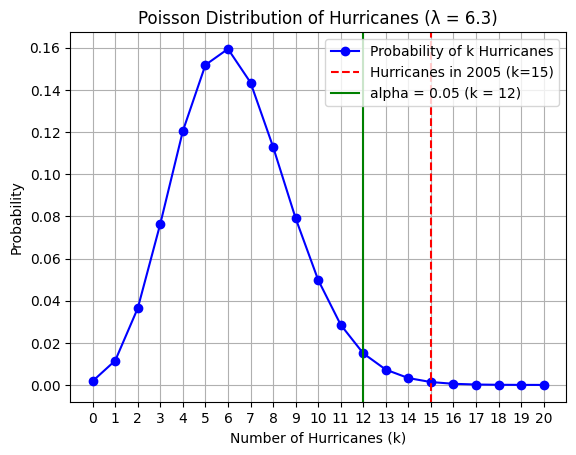

In [4]:
# Find the value of k where the cumulative probability reaches or exceeds 1 - alpha
k_alpha = 0
cumulative_prob = 0
while cumulative_prob < 1 - alpha:
    cumulative_prob += poisson_probability(k_alpha, lambda_)
    k_alpha += 1 
k_alpha -= 1

k_values = np.arange(0, 21)
probabilities = [poisson_probability(k, lambda_) for k in k_values]

# Plot
plt.plot(k_values, probabilities, 'bo-', label='Probability of k Hurricanes')
plt.xlabel('Number of Hurricanes (k)')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Hurricanes (λ = 6.3)')
plt.axvline(x=15, color='red', linestyle='--', label='Hurricanes in 2005 (k=15)')
plt.axvline(x=k_alpha, color='green', label=f'alpha = 0.05 (k = {k_alpha})')
plt.legend()
plt.xticks(k_values)
plt.grid(True)
plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [5]:
# Initialization
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

In [6]:
## DATA

# Number of data
n = len(pre)

# Means
xbar1 = np.mean(pre)
xbar2 = np.mean(post)

# Standard deviations
sigma1 = np.std(pre, ddof=1)
sigma2 = np.std(post, ddof=1)

## FUNCTION

# Final standard deviation
sigma = np.sqrt((sigma1**2 + sigma2**2) / 2)
print(f"=> Sigma :\n\tsigma = {sigma}\n")

# T score with the test statistics
T = (xbar1 - xbar2) / (sigma * np.sqrt(2 / n))
print(f"=> T score :\n\tT = {T}\n")

# Calculate the p-value for two-tailed test
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print(f"=> p-value = {pvalue}")

=> Sigma :
	sigma = 11.04158805003459

=> T score :
	T = -3.786997938137629

=> p-value = 0.004302464132864604


In [7]:
# The p-value obtained is around 0.0043, which is below the commonly accepted threshold of alpha = 0.05 for statistical significance. 
# This means that the difference observed in blood pressures before and after exposure is statistically significant. 
# So, exposure to halogen lighting has a significant effect on participants' systolic blood pressure.

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

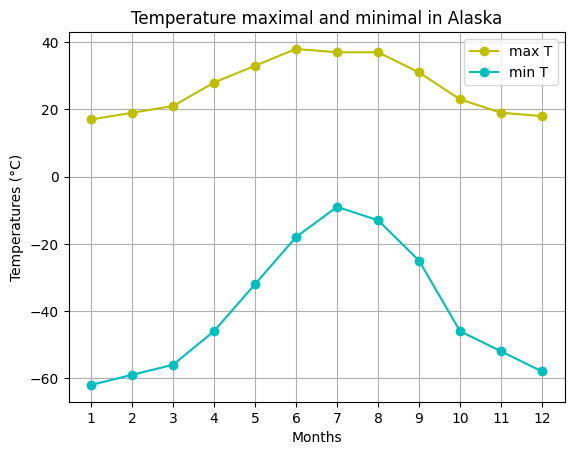

In [8]:
# Plot these temperatures
months = [i for i in range(1,13)]
max_temp = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

fig, ax =plt.subplots()
plt.plot(months, max_temp, 'yo-', label='max T')
plt.plot(months, min_temp, 'co-', label='min T')
plt.title('Temperature maximal and minimal in Alaska')
plt.xlabel('Months')
plt.ylabel('Temperatures (°C)')
plt.xticks(months)
plt.legend()
plt.grid()
plt.show()

In [9]:
# Find a suitable a function that can describe min and max temperatures. 

# We can see that the shape obtained seems to correspond to Gaussian lines for both cases: maximum and minimum temperature. 
# We'll therefore use Gausians to describe these data.

In [10]:
# Fit this function to the data with scipy.optimize.curve_fit().

# Define the fitting function
def gauss(x, sig, mu, ampl, offset):
    return ampl * np.exp(-(((x-mu)/sig)**2)/2) + offset

# Perform the fitting
popt_max, pcov_max = optimize.curve_fit(gauss, months, max_temp)
popt_min, pcov_min = optimize.curve_fit(gauss, months, min_temp)

# Extract the best-fit values of the parameters and thier uncertainties

print("For minimal temperatures : ")
print(f"\t- Parameters :\n {popt_max}\n")
print(f"\t- Covariance matrix :\n {pcov_max}\n")

sig_max, mu_max, ampl_max, offset_max = popt_max
sig_err_max, mu_err_max, ampl_err_max, offset_err_max = np.sqrt(np.diag(pcov_max))

# -----

print("For maximal temperatures : ")
print(f"\t- Parameters :\n {popt_min}\n")
print(f"\t- Covariance matrix :\n {pcov_min}\n")

sig_min, mu_min, ampl_min, offset_min = popt_min
sig_err_min, mu_err_min, ampl_err_min, offset_err_min = np.sqrt(np.diag(pcov_min))

For minimal temperatures : 
	- Parameters :
 [-2.29443106  6.73581547 23.09206932 15.77934858]

	- Covariance matrix :
 [[ 2.75443367e-02  2.12236954e-04 -1.01481783e-01  1.70936950e-01]
 [ 2.12236954e-04  6.31514633e-03 -1.60427055e-03  1.91651868e-03]
 [-1.01481783e-01 -1.60427055e-03  1.32868379e+00 -1.08342072e+00]
 [ 1.70936950e-01  1.91651868e-03 -1.08342072e+00  1.38435008e+00]]

For maximal temperatures : 
	- Parameters :
 [ -1.97590019   7.16452595  52.64929226 -61.32093703]

	- Covariance matrix :
 [[ 5.77327442e-03  4.92554708e-05 -2.27187255e-02  7.06520226e-02]
 [ 4.92554708e-05  2.22850014e-03 -8.73505359e-04  1.09101952e-03]
 [-2.27187255e-02 -8.73505359e-04  1.96936339e+00 -1.05130452e+00]
 [ 7.06520226e-02  1.09101952e-03 -1.05130452e+00  1.41330839e+00]]



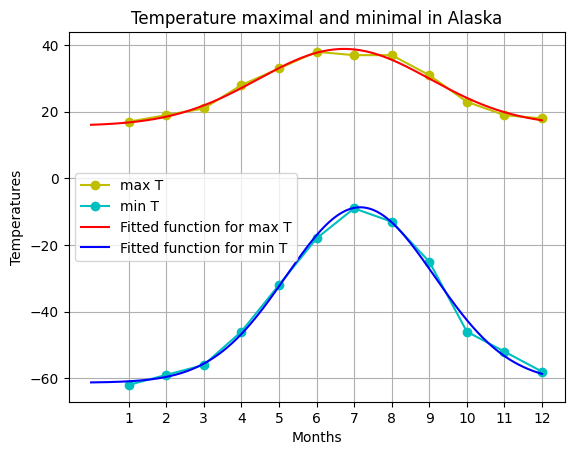

In [11]:
# Plot the result. Is the fit reasonable? If not, why?

x = np.linspace(0, 12, 1000)

plt.plot(months, max_temp, 'yo-', label='max T')
plt.plot(months, min_temp, 'co-', label='min T')

plt.plot(x, gauss(x, *popt_max), 'r', label='Fitted function for max T')
plt.plot(x, gauss(x, *popt_min), 'b', label='Fitted function for min T')

plt.title('Temperature maximal and minimal in Alaska')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks(months)
plt.legend()
plt.grid()
plt.show()

# The results appear to be suitable. 
# In fact, the curve that fits for the maximum and minimum temperature data follows the pattern of the data.

In [12]:
# Is the time offset for min and max temperatures the same within the fit accuracy?
print(f"Time offset for maximun temperatures : {offset_max:.2f} +/- {offset_err_max:.2f} ")
print(f"Time offset for minimun temperatures : {offset_min:.2f} +/- {offset_err_min:.2f} ")

# We can see that the time offsets for min and max temperatures are different despite the fit accuracy.

Time offset for maximun temperatures : 15.78 +/- 1.18 
Time offset for minimun temperatures : -61.32 +/- 1.19 


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [13]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

import pandas as pd
import pickle

# Load the pickle file
filename = "data/residuals_261.pkl"
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

# Creation of the dataframe
df = pd.DataFrame(new_dict.item())
df = df[df['residuals'].abs() < 1.7]

print(f"Here is the filtered dataframe : \n{df}")

Here is the filtered dataframe : 
       residuals  distances
0       1.100000       16.0
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
11     -0.130000        9.3
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10372 rows x 2 columns]


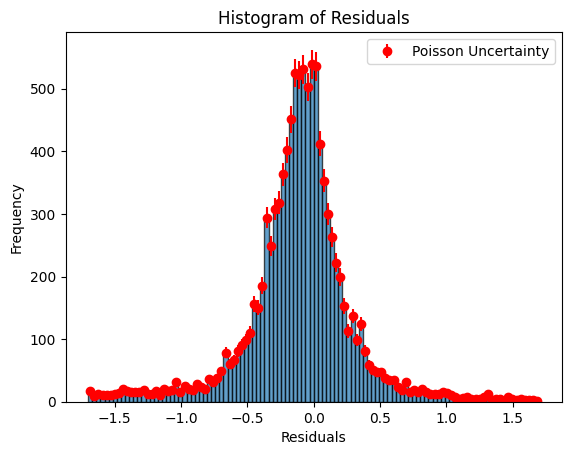

In [14]:
# Creating a histogram of the residuals
n, bins_edges, _ = plt.hist(df['residuals'], bins='auto', edgecolor='black', alpha=0.7, range = (df['residuals'].min(), df['residuals'].max()))

# Bin centers
bin_centers = (bins_edges[:-1] + bins_edges[1:]) / 2

# Setting Poisson uncertainties for each bin
errors = np.sqrt(np.abs(n))

# Plotting the histogram with uncertainties
plt.errorbar(bin_centers, n, yerr = errors, fmt='o', color='r', label='Poisson Uncertainty')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()
plt.show()

In [15]:
# Define the Gaussian fitting function
def gauss(x, sig, mu, ampl, offset):
    return ampl * np.exp(-(((x-mu)/sig)**2)/2) + offset

In [16]:
# Perform the fitting
popt, pcov = optimize.curve_fit(gauss, bin_centers, n)

# Extract the best-fit values of the parameters and their uncertainties
print(f"\t- Parameters :\n {popt}\n")
print(f"\t- Covariance matrix :\n {pcov}\n")

sig, mu, ampl, offset = popt
sig_err, mu_err, ampl_err, offset_err = np.sqrt(np.diag(pcov))

print(f"""
Best-fit parameters and their uncertainties :
\t - sig (Sigma)      : {sig:.2f} +/- {sig_err:.2f}
\t - mu (Mu)          : {mu:.2f} +/- {mu_err:.2f}
\t - ampl (Amplitude) : {ampl:.2f} +/- {ampl_err:.2f}
\t - offset (Offset)  : {offset:.2f} +/- {offset_err:.2f}
"""
)

	- Parameters :
 [-2.10284633e-01 -8.56843470e-02  4.91519522e+02  1.80901452e+01]

	- Covariance matrix :
 [[ 1.51116989e-05  5.63574564e-14  1.27012110e-02  3.50687965e-03]
 [ 5.63574564e-14  1.29898641e-05  1.14337395e-10  1.35401766e-11]
 [ 1.27012110e-02  1.14337395e-10  5.61228703e+01 -4.09840834e+00]
 [ 3.50687965e-03  1.35401766e-11 -4.09840834e+00  5.79602425e+00]]


Best-fit parameters and their uncertainties :
	 - sig (Sigma)      : -0.21 +/- 0.00
	 - mu (Mu)          : -0.09 +/- 0.00
	 - ampl (Amplitude) : 491.52 +/- 7.49
	 - offset (Offset)  : 18.09 +/- 2.41



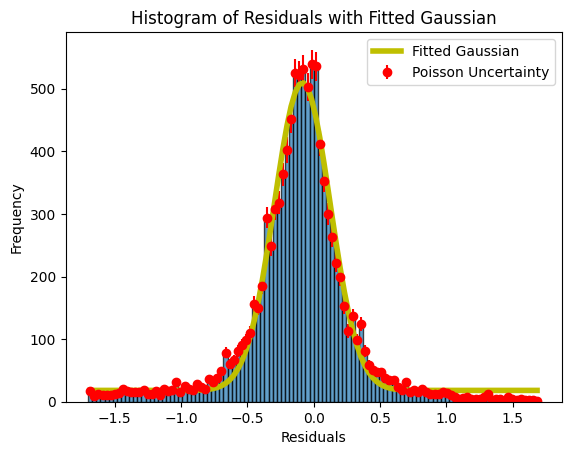

In [17]:
# Plot histogram and fitted Gaussian
plt.hist(df['residuals'], bins='auto', edgecolor='black', alpha=0.7, range = (df['residuals'].min(), df['residuals'].max()))
plt.errorbar(bin_centers, n, yerr = errors, fmt='o', color='r', label='Poisson Uncertainty')
plt.plot(bin_centers, gauss(bin_centers, sig, mu, ampl, offset), color='y', linewidth=4, label='Fitted Gaussian')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Fitted Gaussian')
plt.legend()
plt.show()

In [18]:
# Perform a goodness-of-fit test

# Set the number of degrees of freedom
ndof = len(n) - len(popt)
print(f"n degrees of freedom = {ndof}")

# Calculate the chi^2
chi2 = np.sum((bin_centers - gauss(bin_centers, sig, mu, ampl, offset)**2) / (errors ** 2))
print(f"chi2 = {chi2}")

# Calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print(f"p-value = {pvalue}") # if the p-value is < 0.05, the fit is considered unsatisfactory

n degrees of freedom = 106
chi2 = -12152.462969850172
p-value = 1.0


In [19]:
# We have a p-value of 1.0, for an alpha of 0.05, so the fit is considered satisfactory by this criterion.  
# This suggests a very strong fit between the model and the data.

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [20]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

In [21]:
# Data
df = pd.read_csv('./data/munich_temperatures_average_with_bad_data.txt', sep=' ', header=None, names=['Year', 'Temperature'])

print(df)

            Year  Temperature
0     1995.00274     0.944444
1     1995.00548    -1.611110
2     1995.00821    -3.555560
3     1995.01095    -9.833330
4     1995.01369   -10.222200
...          ...          ...
6674  2013.27379     7.333330
6675  2013.27652    10.000000
6676  2013.27926    10.555600
6677  2013.28200     8.944440
6678  2013.28474    11.166700

[6679 rows x 2 columns]


In [22]:
# Filter the data in the range 2008 to 2012
filtered_df = df[(df["Year"] >= 2008) & (df["Year"] <= 2012)]

print(filtered_df)

            Year  Temperature
4748  2008.00274     -2.94444
4749  2008.00548     -2.66667
4750  2008.00821     -2.66667
4751  2008.01095     -2.00000
4752  2008.01369     -1.94444
...          ...          ...
6204  2011.98836      3.44444
6205  2011.99110      1.27778
6206  2011.99384      2.88889
6207  2011.99658      1.83333
6208  2011.99932      1.50000

[1461 rows x 2 columns]


In [23]:
# Define the fitting function
def f(t, a, b, c):
    """
    t: time in years
    a: amplitude of the temperature variation
    b: phase shift
    c: mean temperature
    """
    return a * np.cos(2 * np.pi * t + b) + c

In [24]:
# Perform the fitting
popt, pcov = optimize.curve_fit(f, filtered_df["Year"], filtered_df["Temperature"], full_output=False)

print(f"Parameters :\n {popt}\n")
print(f"Covariance matrix :\n {pcov}\n")

# Extract the best-fit values of the parameters and thier uncertainties
a_fit, b_fit, c_fit = popt
a_err, b_err, c_err = np.sqrt(np.diag(pcov))

print(f"""
Best-fit parameters and their uncertainties :
\t - a (Amplitude)        : {a_fit:.2f} +/- {a_err:.2f}
\t - b (Phase Shift)      : {b_fit:.2f} +/- {b_err:.2f}
\t - c (Mean Temperature) : {c_fit:.2f} +/- {c_err:.2f}
"""
)

Parameters :
 [-9.98813368 12.33302301  9.38411487]

Covariance matrix :
 [[ 3.22599222e-02 -1.58886781e-07 -5.53376701e-08]
 [-1.58886781e-07  3.23390174e-04 -2.22770003e-08]
 [-5.53376701e-08 -2.22770003e-08  1.61303440e-02]]


Best-fit parameters and their uncertainties :
	 - a (Amplitude)        : -9.99 +/- 0.18
	 - b (Phase Shift)      : 12.33 +/- 0.02
	 - c (Mean Temperature) : 9.38 +/- 0.13



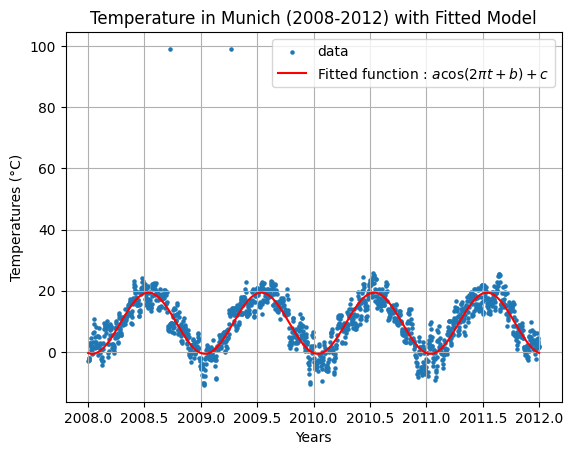

In [25]:
# Plot with fitted function
plt.scatter(filtered_df["Year"], filtered_df["Temperature"], label = "data", s = 5)
plt.plot(filtered_df["Year"], f(filtered_df["Year"], a_fit, b_fit, c_fit), color='red', label='Fitted function : $a \cos(2\pi t + b) + c$')
plt.xlabel("Years")
plt.ylabel("Temperatures (°C)")
plt.title("Temperature in Munich (2008-2012) with Fitted Model")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [26]:
# What is the overall average temperature in Munich, 
# and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

# Overall average temperature
overall_average_temperature = c_fit
print(f"The overall average temperature in Munich, according to the model, is c = c_fit = {overall_average_temperature:.2f}")

# Daily average values for the coldest and hottest times
coldest_day = c_fit - np.abs(a_fit)
hottest_day = c_fit + np.abs(a_fit)

print(f"\t- The coldest temperature in Munich, according to the model, is : {coldest_day:.2f}")
print(f"\t- The hottest temperature in Munich, according to the model, is : {hottest_day:.2f}")

The overall average temperature in Munich, according to the model, is c = c_fit = 9.38
	- The coldest temperature in Munich, according to the model, is : -0.60
	- The hottest temperature in Munich, according to the model, is : 19.37


In [27]:
# What is the meaning of the parameter b, and what physical sense does it have? Describe it with a comment in the code.

# The parameter b in the cosine function f(t)=acos(2πt+b)+c represents the angular phase shift, 
# shifting the curve horizontally on the time axis.

# In physical terms, this phase shift aligns the temperature model with the seasons. 

# In the context of temperatures in Munich, a non-zero phase shift b alters the time of year when maximum and minimum temperatures 
# are observed. 

# The phase shift b is used to adjust the cosine to better coincide with expected periods of the year, such as summer and winter, 
# reflecting the seasonal temperature cycle.

##### Optional part

In [28]:
# Function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: 
        print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

In [29]:
# Define fitting functions

def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c
    
def g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * b * t + c) + d


=> SSR : 
	- SSR for f : 34359.85859996652
	- SSR for g : 34352.79405381256

=> Test : f VS g
p-value: 0.584 , additional parameter necessary: NO


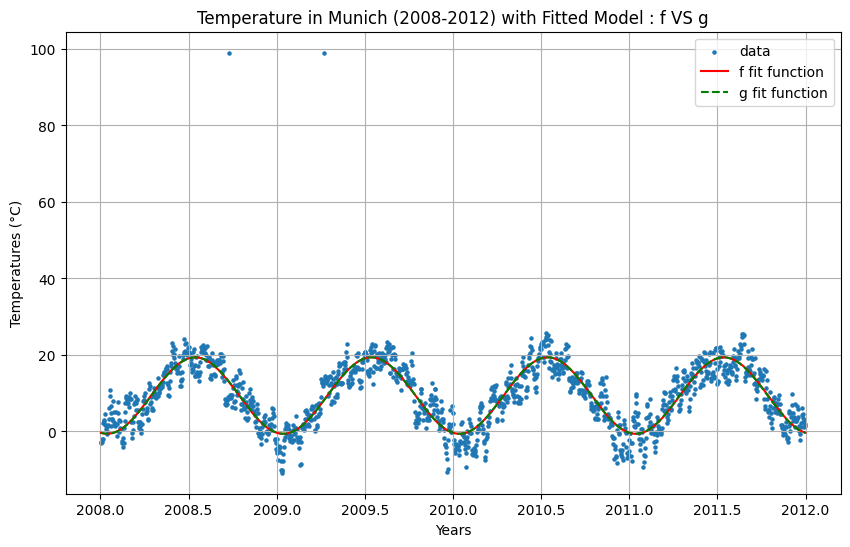

In [30]:
alpha = 0.05
N = len(filtered_df)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(filtered_df["Year"], filtered_df["Temperature"], label = "data", s = 5)

# -----

# Perform the curve fitting for the original function f
popt_f, pcov_f = optimize.curve_fit(f, filtered_df["Year"], filtered_df["Temperature"], full_output=False)
a_fit, b_fit, c_fit = popt_f
a_err, b_err, c_err = np.sqrt(np.diag(pcov_f))

y_f = f(filtered_df["Year"], a_fit, b_fit, c_fit)
ax.plot(filtered_df["Year"], y_f, color = 'r', label = "f fit function")
ssr_f = np.sum((y_f - filtered_df["Temperature"])**2)
ndof_f = len(popt_f) - 1 # n of parameters - 1

# -----

# Perform the curve fitting for the new function g
popt_g, pcov_g = optimize.curve_fit(g, filtered_df["Year"], filtered_df["Temperature"], full_output=False)
a_fit, b_fit, c_fit, d_fit = popt_g
a_err, b_err, c_err, d_err = np.sqrt(np.diag(pcov_g))

y_g = g(filtered_df["Year"], a_fit, b_fit, c_fit, d_fit)
ax.plot(filtered_df["Year"], y_g, color = 'g', linestyle='--', label = "g fit function")
ssr_g = np.sum((y_g - filtered_df["Temperature"])**2)
ndof_g = len(popt_g) - 1 # n of parameters - 1

# -----

plt.xlabel("Years")
plt.ylabel("Temperatures (°C)")
plt.title("Temperature in Munich (2008-2012) with Fitted Model : f VS g")
plt.legend(loc='best')
plt.grid(True)

print(f"\n=> SSR : \n\t- SSR for f : {ssr_f}\n\t- SSR for g : {ssr_g}")

# Run F-test => test f VS g
print("\n=> Test : f VS g")
pval_f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, N, verbose=True)